In [2]:
import matplotlib.pyplot as plt
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import numpy as np
import pandas as pd
import os

import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier  ## KNN
from sklearn.linear_model import LogisticRegressionCV  ## logistic regression
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.svm import SVC  ## SVM

from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [3]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [4]:
#Load Data
# First Dataset
datas = []
X, Y = load_planar_dataset()
name = 'flower'
X = X.T
Y = Y[0]
datas.append((name, X, Y))

# Second Dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datas.append(("noisy_moons", noisy_moons[0], noisy_moons[1]))

Accuracy 91.5%


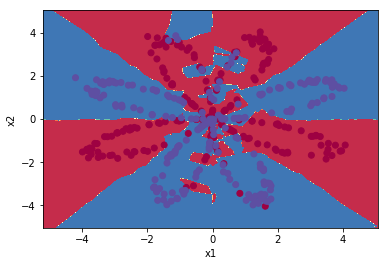

Accuracy 96.5%


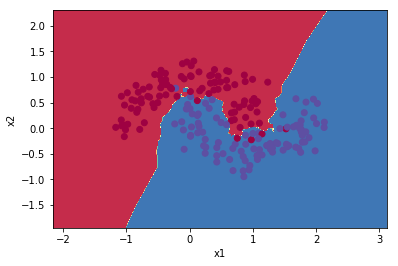

In [5]:
#K Nearest Neighbor(KNN) KNN顧名思義就是找K個最近的點，然後讓他們投票，如果與你最近的五個資料點當中，有3個是第一類，那麼這個測試點就是第一類

for name, X, Y in datas:
    clf = KNeighborsClassifier(n_neighbors=3)  ## 設定用最近的3個鄰居投票
    clf.fit(X, Y)  ## 訓練模型

    y_pred = clf.predict(X)  ## 預測模型
    print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")  ## 計算精準度
    
    plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)  ## 視覺化分類器的分類結果
    plt.savefig(os.path.join('pic', name+'_knn'))  ## 儲存圖片
    plt.show()

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy 47.0%


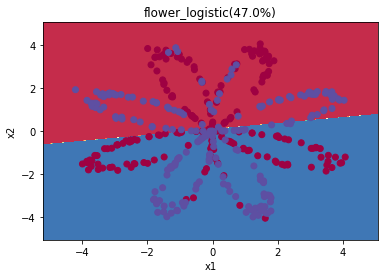

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy 87.0%


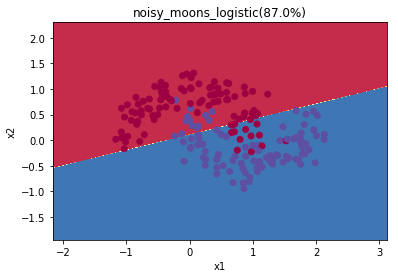

In [6]:
#Logistic Regression

for name, X, Y in datas:
    clf = LogisticRegressionCV()
    clf.fit(X, Y)
    
    y_pred = clf.predict(X)
    print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")
    
    plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)
    plt.title(name+'_logistic(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
    plt.savefig(os.path.join('pic', name+'_logistic'))
    plt.show()

Accuracy 100.0%


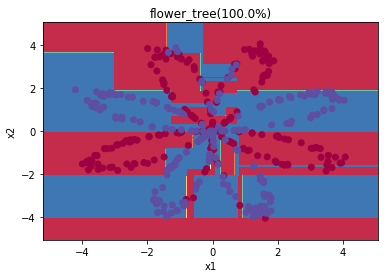

Accuracy 100.0%


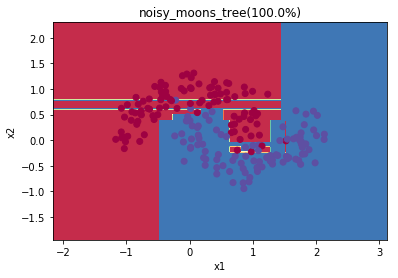

In [7]:
#Decision Tree

for name, X, Y in datas:
    clf = DecisionTreeClassifier()
    clf.fit(X, Y)
    
    y_pred = clf.predict(X)
    print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")
    
    plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)
    plt.title(name+'_tree(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
    plt.savefig(os.path.join('pic', name+'_tree'))
    plt.show()

Accuracy 47.5%


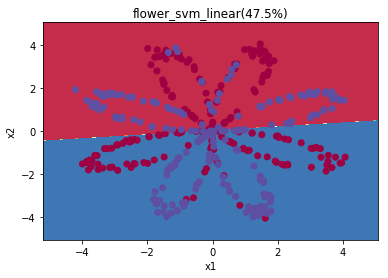

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 79.5%


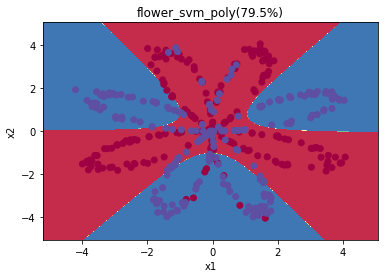

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 84.0%


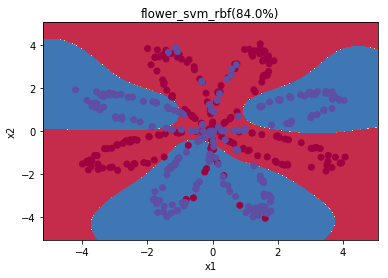

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 34.25%


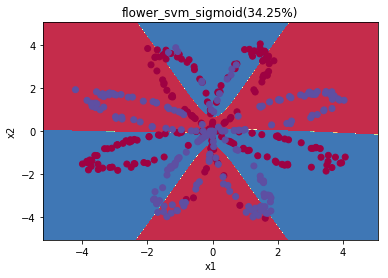

Accuracy 86.0%


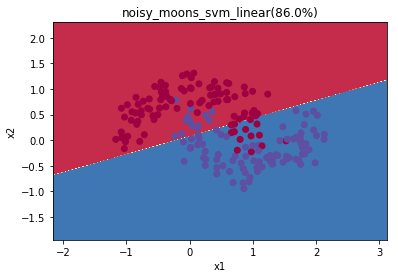

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 80.5%


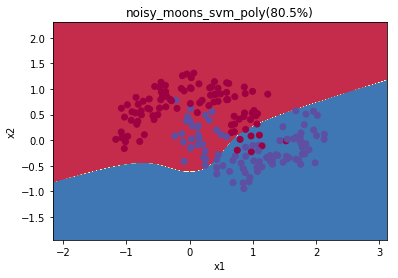

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 92.5%


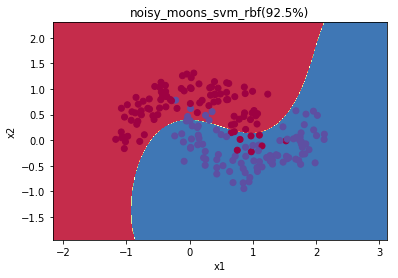

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 77.0%


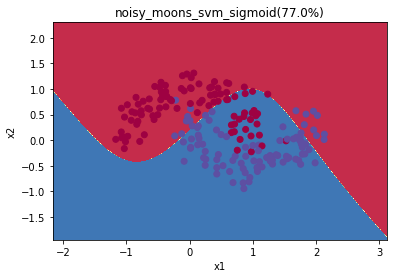

In [8]:
kernels =['linear', 'poly', 'rbf', 'sigmoid']  ## 選擇kernel
for name, X, Y in datas:
    for k in kernels:
        clf = SVC(C=1.0, kernel=k)  ## 這邊大家可以調整懲罰項C試試看
        clf.fit(X, Y)

        y_pred = clf.predict(X)
        print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")

        plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)
        plt.title(name+'_svm_'+ k +'(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
        plt.savefig(os.path.join('pic', name+'_svm_'+ k))
        plt.show()

In [11]:
import math
import string
import re

from sklearn.model_selection import train_test_split
import xgboost

def preprocess(df):
    avg_age = df['Age'].median()

    def agecat(age):
        if age <= 16:
            cat = 0
        elif age > 16 and age <= 32:
            cat = 1
        elif age > 32 and age <= 48:
            cat = 2
        elif age < 48 and age <= 64:
            cat = 3
        else:
            cat = 4
        return cat
    
    def farecat(f):
        if f <= 16:
            cat = 0
        elif f > 17 and f <= 32:
            cat = 1
        elif f > 32 and f <= 48:
            cat = 2
        elif f < 48 and f <= 64:
            cat = 3
        elif f < 64 and f <= 80:
            cat = 4
        elif f < 80 and f <= 96:
            cat = 5
        else:
            cat = 6
        return cat
    
    # avg_fare
    fares_notnull = df[pd.notnull(df['Fare'])]['Fare']
    avg_fare = fares_notnull.median()

    # ticket
    ticket_cat = {}
    for ticket in df['Ticket']:
        if ticket.isdigit():
            ticket_cat[ticket] = 1
        elif ticket.startswith('A'):
            ticket_cat[ticket] = 2
        elif ticket.startswith('C'):
            ticket_cat[ticket] = 3
        elif ticket.startswith('F'):
            ticket_cat[ticket] = 4
        elif ticket.startswith('P'):
            ticket_cat[ticket] = 5
        elif ticket.startswith('SOTON'):
            ticket_cat[ticket] = 6
        elif ticket.startswith('STON'):
            ticket_cat[ticket] = 7
        elif ticket.startswith('S'):
            ticket_cat[ticket] = 8
        elif ticket.startswith('W'):
            ticket_cat[ticket] = 9
        else:
            ticket_cat[ticket] = 0
            
    ticket_cat1 = {}
    for num, name in enumerate(list(set([item.split()[0].replace(".", "").replace("/", "") for item in df['Ticket'] if not item.isdigit()]))):
        ticket_cat1[name] = num
    
    # cabin
    cabin_cat = {}
    for cabin in df['Cabin']:
        if pd.isnull(cabin):
            cabin_cat[cabin] = 0
        elif cabin.startswith('A'):
            cabin_cat[cabin] = 1
        elif cabin.startswith('B'):
            cabin_cat[cabin] = 2
        elif cabin.startswith('C'):
            cabin_cat[cabin] = 3
        elif cabin.startswith('D'):
            cabin_cat[cabin] = 4
        elif cabin.startswith('E'):
            cabin_cat[cabin] = 5
        else:
            cabin_cat[cabin] = 0
    
    # embarked
    embarked_cat = {}
    for embarked in df['Embarked']:
        if pd.isnull(embarked):
            embarked_cat[embarked] = 0
        elif embarked.startswith('S'):
            embarked_cat[embarked] = 0
        elif embarked.startswith('Q'):
            embarked_cat[embarked] = 1
        elif embarked.startswith('C'):
            embarked_cat[embarked] = 2
            
    # title
    title_mapping= {
        'Ms':"Miss",
        'Mlle':"Miss",
        'Miss':"Miss",
        'Mrs':"Mrs",
        'Mme':"Mrs",
        'MrsMartin(ElizabethL':"Mrs",
        'Mr':"Mr"
        }
    
    title_cat = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    
    # Name_with specail chars
    def withspecailchar(name):
        for char in name:
            if char in string.punctuation:
                return 1
        return 0
    
    def applyfun(row):
        row['Has_Cabin'] = 0 if pd.isnull(row['Cabin']) else 1
        row['Cabin'] = cabin_cat.get(row['Cabin'])
        row['Age'] = row['Age'] if pd.notnull(row['Age']) else avg_age
        row['Age_Cat'] = agecat(row['Age'])
        row['Fare'] = row['Fare'] if pd.notnull(row['Fare']) else avg_fare
        row['Fare_log2'] = math.log(row['Fare'], 2) if  row['Fare'] != 0 else 0
        row['Fare_Cat'] = farecat(row['Fare'])
        row['Ticket'] = ticket_cat.get(row['Ticket'])
        processed_ticket = row['Ticket'].split()[0].replace(".", "").replace("/", "") if not str(row['Ticket']).isdigit() else None
        row['Embarked'] = embarked_cat.get(row['Embarked'])
        row['Sex'] = 1 if row['Sex'] == 'male' else 0
        row['Name_Length'] = len(row['Name'])
        row['Name_With_Special_Char'] = withspecailchar(row['Name'].replace(',', "").replace('.', ""))
        row['Family_Size'] = row['SibSp'] + row['Parch']
        call = re.search(r'\,.+\.', row['Name']).group(0).replace(",", "").replace(".", "").replace(" ", "")
        call_cat = title_cat.get(title_mapping.get(call, "Rare"))
        row['Title'] = call_cat
        return row
    
    df = df.apply(applyfun, axis=1)
    df.drop('Name', axis=1, inplace=True)
    df.drop('Fare', axis=1, inplace=True)

    return df

In [14]:
df = pd.read_csv('train.csv')
df = preprocess(df)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Has_Cabin,Age_Cat,Fare_log2,Fare_Cat,Name_Length,Name_With_Special_Char,Family_Size,Title
0,1,0,3,1,22.0,1,0,2,0,0,0,1,2.857981,0,23,0,1,1
1,2,1,1,0,38.0,1,0,5,3,2,1,2,6.155492,5,51,1,1,3
2,3,1,3,0,26.0,0,0,7,0,0,0,1,2.986411,0,22,0,0,2
3,4,1,1,0,35.0,1,0,1,3,0,1,2,5.730640,4,44,1,1,3
4,5,0,3,1,35.0,0,0,1,0,0,0,2,3.008989,0,24,0,0,1


In [15]:

X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Cabin', 'Embarked', 'Has_Cabin', 'Age_Cat', 'Fare_log2',
       'Fare_Cat', 'Name_Length', 'Name_With_Special_Char', 'Family_Size',
       'Title']].values
Y = df['Survived'].values

In [16]:

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size =0.5)  ## 一般如果測試資料集超過1000筆就可以了，所以比率不會設這麼高
print(X_train.shape)  ## (445, 17)
print(X_valid.shape)  ## (446, 17) 
print(Y_train.shape)  ## (445,)
print(Y_valid.shape)  ## (446,)

(445, 17)
(446, 17)
(445,)
(446,)


In [21]:
def get_accuracy(clf):
    clf = clf()
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    return (str(sum(Y_valid == y_pred)/Y_valid.shape[0]))

print('SVM: ', get_accuracy(SVC))
print('DecisionTree: ', get_accuracy(DecisionTreeClassifier))
print('RandomForest: ', get_accuracy(RandomForestClassifier))
print('AdaBoost: ', get_accuracy(AdaBoostClassifier))  ## Boosting的演算法
print('XGB: ', get_accuracy(XGBClassifier))

# SVM:  0.609865470852
# DecisionTree:  0.764573991031
# RandomForest:  0.795964125561
# AdaBoost:  0.784753363229
# XGB:  0.80269058296

SVM:  0.6031390134529148
DecisionTree:  0.7488789237668162
RandomForest:  0.7959641255605381
AdaBoost:  0.7892376681614349
XGB:  0.8026905829596412


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.04
params['max_depth'] = 3
params['learning_rate'] = 0.01

d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgboost.train(params, d_train, 100, watchlist, early_stopping_rounds=100, verbose_eval=10)
y_pred = bst.predict(xgboost.DMatrix(X_valid))
print("Accuracy: ", str(sum(Y_valid == (y_pred > 0.5))/Y_valid.shape[0]))

# # [0]	train-logloss:0.687884	valid-logloss:0.6885
# # Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

# # Will train until valid-logloss hasn't improved in 100 rounds.
# # [10]	train-logloss:0.640351	valid-logloss:0.646802
# # [20]	train-logloss:0.600589	valid-logloss:0.612317
# # [30]	train-logloss:0.566967	valid-logloss:0.583539
# # [40]	train-logloss:0.538181	valid-logloss:0.559665
# # [50]	train-logloss:0.513437	valid-logloss:0.53965
# # [60]	train-logloss:0.492055	valid-logloss:0.522721
# # [70]	train-logloss:0.473494	valid-logloss:0.508487
# # [80]	train-logloss:0.457333	valid-logloss:0.496546
# # [90]	train-logloss:0.443178	valid-logloss:0.48698

[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-logloss:0.688088	valid-logloss:0.688399
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 100 rounds.
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\x

[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:27:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e